### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 12.1, 12.2, 12.3:</span> Supervised Machine Learning: Deep (*Convolutional*) Neural  Network per il riconoscimento di immagini

# <span style="color:red"> ESERCIZIO 12.1</span>

L'obiettivo dell'esercizio 12.1 è utilizzare modelli di deep neural network, implementati nel pacchetto Python Keras, per distinguere le dieci cifre 0,1,2,3,4,5,6,7,8,9 scritte a meno.

Il dataset MNIST comprende $70.000$ cifre scritte a mano, ciascuna delle quali è contenuta in un'immagine quadrata divisa in una griglia di pixel $28\times 28$. Ogni pixel può assumere $256$ gradazioni di colore grigio, interpolando tra il bianco e il nero, e quindi ogni punto dati può assumere un valore in un insieme ${0,1,\dots,255}$. 
Poiché ci sono $10$ soluzioni nel problema, corrispondenti alle dieci cifre, si tratta di un problema di classificazione.

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Va scommentato se no muore il Kernel
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Vengono caricate le 70.000 cifre scritte a mano dal MNIST e vengono divise in dati di train e di test.

In [4]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


I dati devono essere convertiti (linee di zeri ed uno) perché possano essere usati dalla categorical cross entropy.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 7


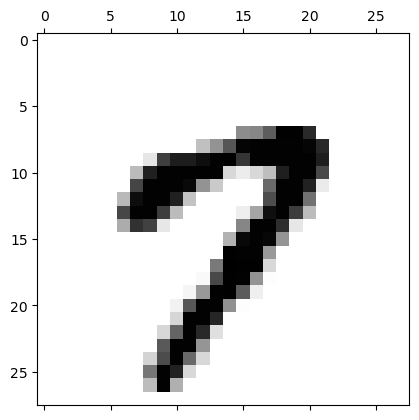

... and with label [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[15])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[15,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[15], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Si crea quindi la DNN. Il layer di input deve accettare $28\times28=784$ valori della scala di grigi mentre quello di output è composto da 10 neuroni, uno per ogni cifra da riconoscere.

Ogni layer Dense() accetta come suo primo argomento obbligatorio un numero intero che specifica il numero di neuroni. Il tipo di funzione di attivazione è definito tramite il comando activation, il cui argomento è il nome della funzione di attivazione nel formato di una stringa (relu, tanh, elu, sigmoid, softmax,...).

Viene inoltre introdotto il Dropout, al fine di evitare che il modello si adatti troppo ai dati di training e non generalizzi bene ai nuovi dati (overfitting). Sostanzialmente durante il training vengono disattivati casualmente dei neuroni, così da ridurre la dipendenza e l'interconnessione tra i nodi della rete neurale.
Durante la fase di test, il Dropout non viene applicato.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Si definisce qui un metodo per compilare il modello che permette di cambiare facilmente l'ottimizzatore che verrà utilizzato.  
Gli altri argomenti sono la funzione di costo (per problemi di classificazione si usa la categorical_crossentropy) e la metrica di validazione.

In [7]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Inizio del training: mescolare i dati di training migliora la stabilità del modello. Di conseguenza, il training avviene per un determinato numero di epoche, dove in ognuna di esse tutti i training data - divisi in minibatch - vengnono utilizzati.

Definita la dimensione del minibatch ed il numero di epoche (30), si allena la rete usando il metodo fit( ) specificando i dati di training e di test.

In [8]:
# training parameters
batch_size = 32
epochs = 30     #aumento il numero di epoche da 5 iniziali

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7669 - acc: 0.7740 - val_loss: 0.3181 - val_acc: 0.9166
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3917 - acc: 0.8890 - val_loss: 0.2439 - val_acc: 0.9307
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3174 - acc: 0.9099 - val_loss: 0.2025 - val_acc: 0.9404
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2688 - acc: 0.9247 - val_loss: 0.1765 - val_acc: 0.9495
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2380 - acc: 0.9337 - val_loss: 0.1621 - val_acc: 0.9520
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2142 - acc: 0.9399 - val_loss: 0.1440 - val_acc: 0.9564
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1935 - acc: 0.9453 - val_loss: 0.1323 - val_acc: 0.9595
Epoch 8/30
1875/1875 [==============================] - 8s 4m

## <span style="color:blue"> GRAFICO A)</span> Accuracy e funzione di costo in funzione del numero di epoche

Metodo evaluate( ): permette di tener traccia del costo e dell'accuracy, che vengono riportate nel grafico seguente in funzione del numero di epoche.  
Si noti che l'accuratezza del training può essere superata da quella di testing: ciò è dovuto al dropout, attivo solo nella prima fase.

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - acc: 0.9793

Test loss: 0.06707363575696945
Test accuracy: 0.9793000221252441


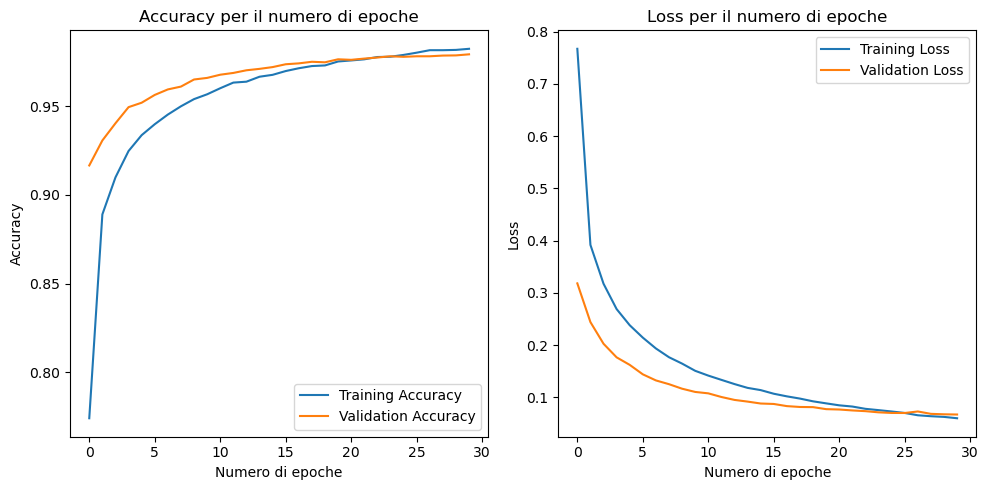

In [9]:
import matplotlib.pyplot as plt

# Evaluate the model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training history

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Numero di epoche')
plt.legend(loc='best')
plt.title('Accuracy per il numero di epoche')

# Plot loss history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Numero di epoche')
plt.legend(loc='best')
plt.title('Loss per il numero di epoche')

plt.tight_layout()
plt.show()

Giustamente l'accuracy cresce mentre la loss decresce all'aumentare del numero di epoche!

Previsione su nuove cifre:

313/313 [==============================] - 1s 3ms/step


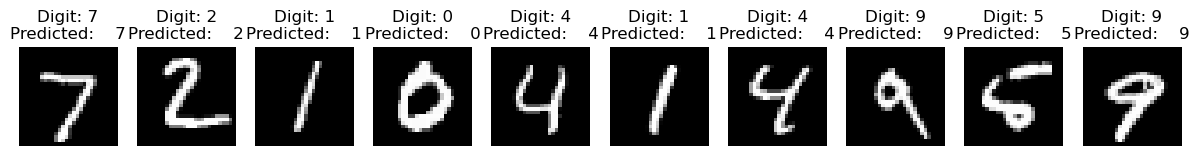

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Le cifre predette risultano quindi corrette!

Nota: Si sono provati vari ottimizzatori, registrando il loro costo e la loro accuracy nei dati di testing, deducendo che Adamax e SGD siano gli ottimizzatore preferibili in questo caso, in quanto minimizzano il costo e massimizzano l'accuracy.

# <span style="color:red"> ESERCIZIO 12.2</span>

Un Convolutional Neural Network è una rete neurale "invariante traslazionalmente" che rispetta localmente i dati in input.

I suoi Layer sono quindi densi e convoluzionali (ovvero applicanti una serie di filtri - matrici di pesi - all'input). 
Con il codice di seguito si intendono quindi sfruttare le correlazioni spaziali locali tra i pixel di ciascuno dei numeri scritti a mano e l'invarianza traslazionale, al fine di migliorare l'accuratezza del modello di classificazione.

In [11]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Creazione della Rete Neurale Convoluzionale! (Completo il codice fornito nella consegna)

Tipi di Layer aggiunti:
- Conv2D: creano una convoluzione degli input, ovvero una sorta di filtraggio dell'immagine tramite una finestra (kernel) che scorre su di essa, moltiplica i filtri punto per punto ai valori dell'immagine e somma i risultati per produrre un valore singolo nella _feature map_ di output. Questa operazione consente di estrarre caratteristiche significative dalle immagini, come linee, bordi, texture e forme.
- MaxPooling2D: riducono la dimensione spaziale delle feature map estratte dai layer di convoluzione, permettendo di diminuire il numero di parametri e la complessità computazionale del modello, consentendo al contempo di mantenere le informazioni salienti delle feature estratte. L'operazione di Pooling viene applicata suddividendo feature map in regioni rettangolari sovrapposte e selezionando il valore massimo all'interno di ogni regione.

In [12]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(10, kernel_size=(5, 5),        # Aggiungo layer
                     activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))              # Infine uso Dense per tornare in 1D
    model.add(Dense(num_classes, activation='softmax'))   # Funzione di attivazione softmax
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

Fase di training: si è visto come un numero di epoche pari a 30 risulti adeguato

In [13]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2024 - acc: 0.5897 - val_loss: 0.2766 - val_acc: 0.9198
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4331 - acc: 0.8633 - val_loss: 0.1545 - val_acc: 0.9543
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3249 - acc: 0.8996 - val_loss: 0.1262 - val_acc: 0.9617
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2720 - acc: 0.9175 - val_loss: 0.1063 - val_acc: 0.9671
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2405 - acc: 0.9280 - val_loss: 0.1020 - val_acc: 0.9676
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2177 - acc: 0.9336 - val_loss: 0.0920 - val_acc: 0.9693
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2000 - acc: 0.9395 - val_loss: 0.0832 - val_acc: 0.9733
Epoch 8/30
1875/1875 [==============================] -

## <span style="color:green"> GRAFICO B)</span> Accuracy e funzione di costo in funzione del numero di epoche

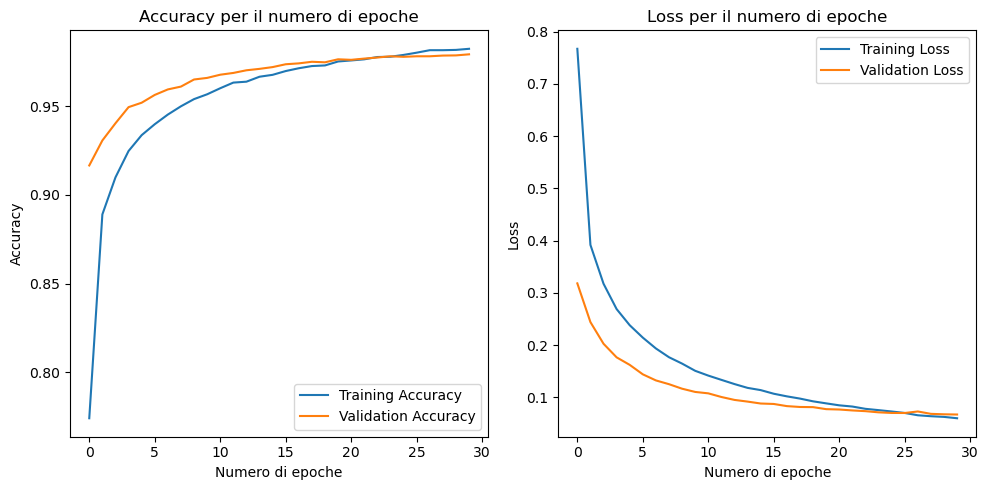

In [14]:
# Summarize training history

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Numero di epoche')
plt.legend(loc='best')
plt.title('Accuracy per il numero di epoche')

# Plot loss history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Numero di epoche')
plt.legend(loc='best')
plt.title('Loss per il numero di epoche')

plt.tight_layout()
plt.show()

Test del modello creato! Le cifre predette sono esatte!

313/313 [==============================] - 1s 3ms/step


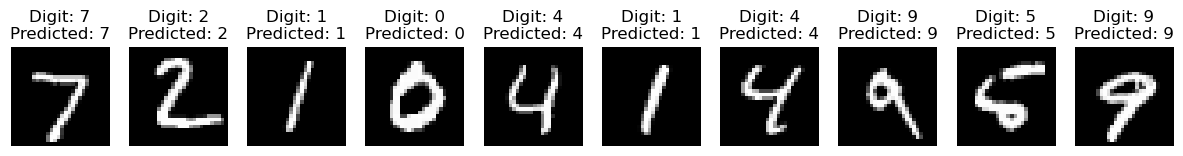

In [15]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# <span style="color:red"> ESERCIZIO 12.3</span>

Tramite l'installazione dell'applicazione _GIMP (GNU Image Manipulation Program)_ si creano 10 immagini $28\times28$ pixel in cui sono scritte con la propria calligrafia le 10 cifre. Queste sono state importate tramite la libreria _PIL (Python Image Library)_ e riconosciute dalla rete neurale allenata nei due esercizi soprastanti.

Si è giocato sulle varie tipologie di 4 esistenti, che sono state tutte predette dalla rete neurale. Si riscontrano invece discrepanze per il 7 (letto come 2) ed il 9 (letto come 3)

In [16]:
from PIL import Image
import os

def plot_digit(filename):
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    print(data.shape)
    data = data.reshape(1, xdim, ydim, 1)  # Correct form for CNN model
    print(data.shape)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim, ydim)

    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off')
    plt.show()

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 34ms/step


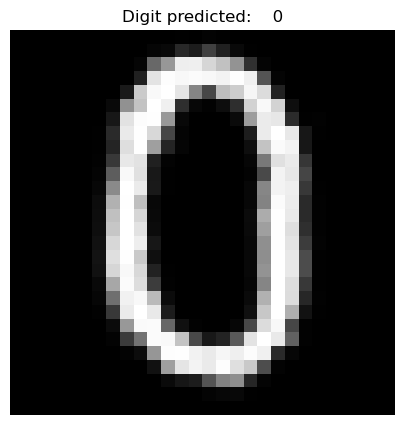

In [17]:
digit_filename = "./Zero.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


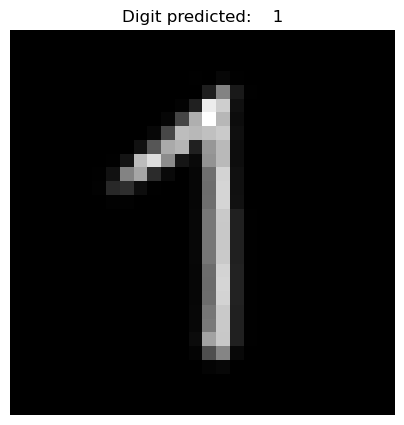

In [18]:
digit_filename = "./One.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 35ms/step


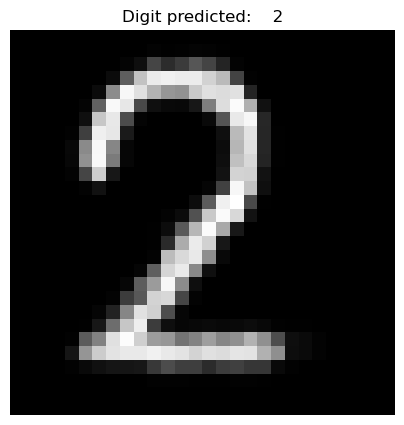

In [19]:
digit_filename = "./Two.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


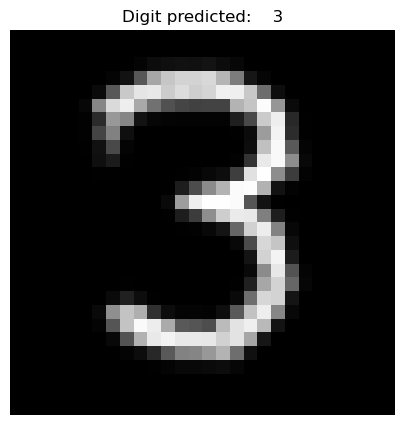

In [20]:
digit_filename = "./Three.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


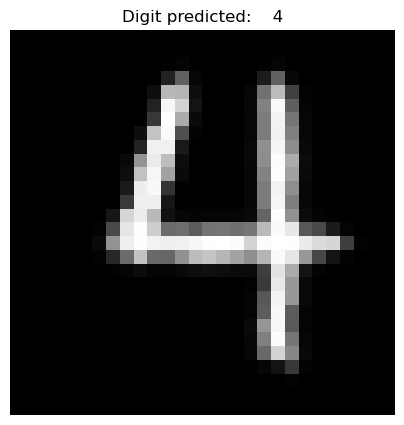

In [21]:
digit_filename = "./Four.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 39ms/step


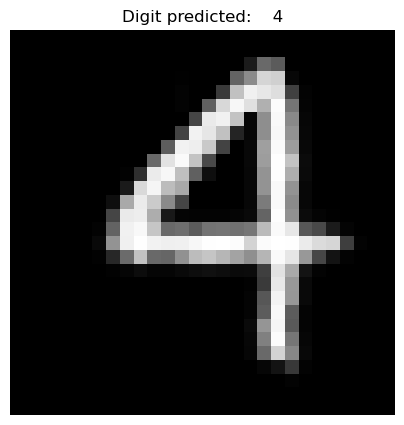

In [22]:
digit_filename = "./ClosedFour.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step


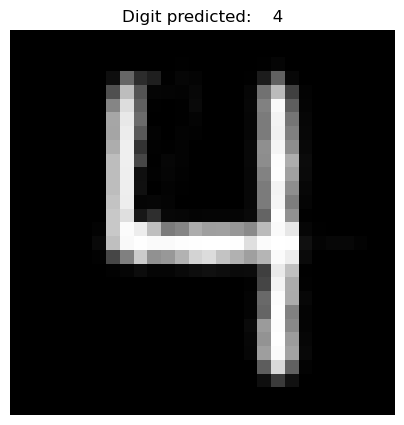

In [23]:
digit_filename = "./DigitalFour.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


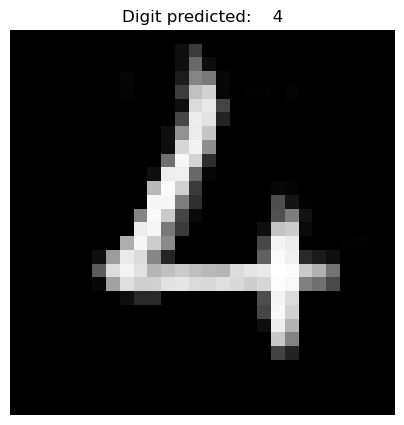

In [24]:
digit_filename = "./FancyFour.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


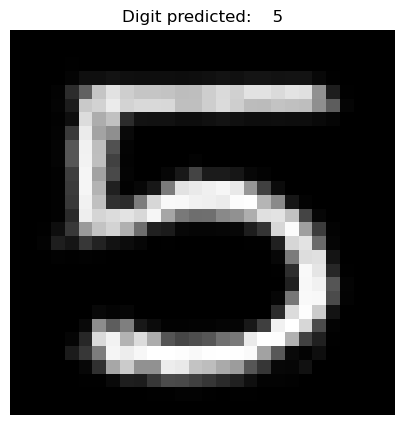

In [25]:
digit_filename = "./Five.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 23ms/step


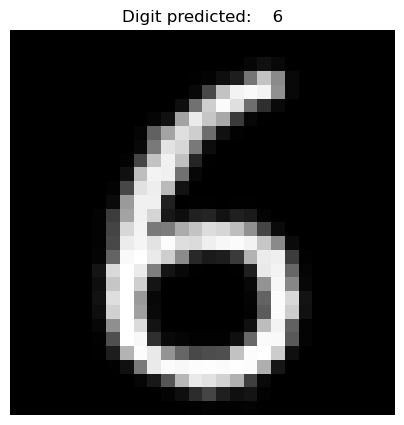

In [26]:
digit_filename = "./Six.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


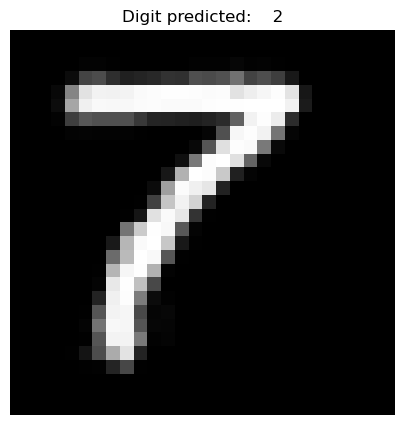

In [35]:
digit_filename = "./Seven.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


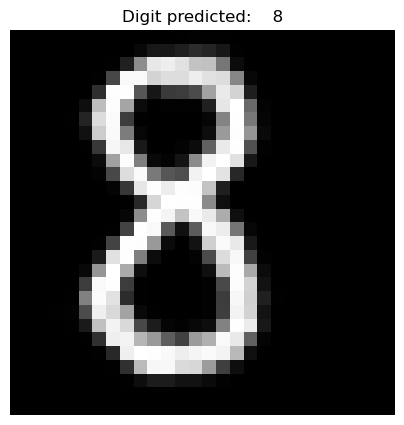

In [28]:
digit_filename = "./Eight.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 25ms/step


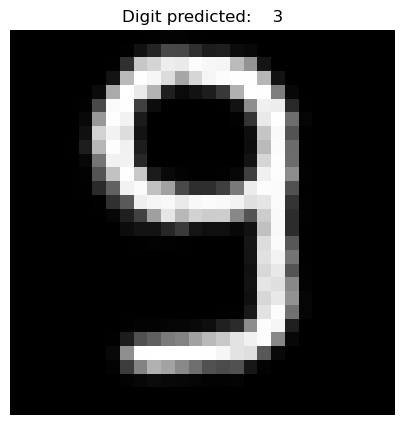

In [36]:
digit_filename = "./Nine.png"
plot_digit(digit_filename)